<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,38.910992,23.308974,0.136838,72.356804,72.136115,0.220688
1,0.0,1.0,80.417626,20.625194,-0.299004,110.743816,110.902869,-0.159052
2,0.0,2.0,33.370747,34.933073,-0.120251,78.183569,78.256673,-0.073104
3,0.0,3.0,75.924902,97.816383,-0.012663,183.728621,183.806832,-0.078210
4,0.0,4.0,34.023029,57.747112,0.167271,101.937413,101.781386,0.156026
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.140413,74.702758,0.037404,105.880576,105.834690,0.045886
19996,999.0,16.0,72.979022,47.665138,0.044567,130.688726,130.646739,0.041987
19997,999.0,17.0,64.571916,25.806772,0.132354,100.511042,100.414914,0.096128
19998,999.0,18.0,66.568630,65.792293,-0.075334,142.285588,142.342170,-0.056582


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,38.910992,23.308974,0.136838,72.356804,72.136115,0.220688
1,0.0,1.0,80.417626,20.625194,-0.299004,110.743816,110.902869,-0.159052
2,0.0,2.0,33.370747,34.933073,-0.120251,78.183569,78.256673,-0.073104
3,0.0,3.0,75.924902,97.816383,-0.012663,183.728621,183.806832,-0.078210
4,0.0,4.0,34.023029,57.747112,0.167271,101.937413,101.781386,0.156026
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.140413,74.702758,0.037404,105.880576,105.834690,0.045886
19996,999.0,16.0,72.979022,47.665138,0.044567,130.688726,130.646739,0.041987
19997,999.0,17.0,64.571916,25.806772,0.132354,100.511042,100.414914,0.096128
19998,999.0,18.0,66.568630,65.792293,-0.075334,142.285588,142.342170,-0.056582


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.910992  23.308974  0.136838   72.356804   72.136115  0.220688
      1.0    80.417626  20.625194 -0.299004  110.743816  110.902869 -0.159052
      2.0    33.370747  34.933073 -0.120251   78.183569   78.256673 -0.073104
      3.0    75.924902  97.816383 -0.012663  183.728621  183.806832 -0.078210
      4.0    34.023029  57.747112  0.167271  101.937413  101.781386  0.156026
...                ...        ...       ...         ...         ...       ...
999.0 15.0   21.140413  74.702758  0.037404  105.880576  105.834690  0.045886
      16.0   72.979022  47.665138  0.044567  130.688726  130.646739  0.041987
      17.0   64.571916  25.806772  0.132354  100.511042  100.414914  0.096128
      18.0   66.568630  65.792293 -0.075334  142.285588  142.342170 -0.056582
      19.0   89.597428  54.982001 -0.028524  154.550904  154.563968 -0.013064

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.910992  23.308974  0.136838   72.356804   72.136115  0.220688
      1.0    80.417626  20.625194 -0.299004  110.743816  110.902869 -0.159052
      2.0    33.370747  34.933073 -0.120251   78.183569   78.256673 -0.073104
      3.0    75.924902  97.816383 -0.012663  183.728621  183.806832 -0.078210
      4.0    34.023029  57.747112  0.167271  101.937413  101.781386  0.156026
...                ...        ...       ...         ...         ...       ...
999.0 15.0   21.140413  74.702758  0.037404  105.880576  105.834690  0.045886
      16.0   72.979022  47.665138  0.044567  130.688726  130.646739  0.041987
      17.0   64.571916  25.806772  0.132354  100.511042  100.414914  0.096128
      18.0   66.568630  65.792293 -0.075334  142.285588  142.342170 -0.056582
      19.0   89.597428  54.982001 -0.028524  154.550904  154.563968 -0.013064

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,38.910992,23.308974,0.136838,72.356804,72.136115,0.220688
1,0.0,1.0,80.417626,20.625194,-0.299004,110.743816,110.902869,-0.159052
2,0.0,2.0,33.370747,34.933073,-0.120251,78.183569,78.256673,-0.073104
3,0.0,3.0,75.924902,97.816383,-0.012663,183.728621,183.806832,-0.078210
4,0.0,4.0,34.023029,57.747112,0.167271,101.937413,101.781386,0.156026
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,21.140413,74.702758,0.037404,105.880576,105.834690,0.045886
19996,999.0,16.0,72.979022,47.665138,0.044567,130.688726,130.646739,0.041987
19997,999.0,17.0,64.571916,25.806772,0.132354,100.511042,100.414914,0.096128
19998,999.0,18.0,66.568630,65.792293,-0.075334,142.285588,142.342170,-0.056582


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.910992  23.308974  0.136838   72.356804   72.136115  0.220688
      1.0    80.417626  20.625194 -0.299004  110.743816  110.902869 -0.159052
      2.0    33.370747  34.933073 -0.120251   78.183569   78.256673 -0.073104
      3.0    75.924902  97.816383 -0.012663  183.728621  183.806832 -0.078210
      4.0    34.023029  57.747112  0.167271  101.937413  101.781386  0.156026
...                ...        ...       ...         ...         ...       ...
999.0 15.0   21.140413  74.702758  0.037404  105.880576  105.834690  0.045886
      16.0   72.979022  47.665138  0.044567  130.688726  130.646739  0.041987
      17.0   64.571916  25.806772  0.132354  100.511042  100.414914  0.096128
      18.0   66.568630  65.792293 -0.075334  142.285588  142.342170 -0.056582
      19.0   89.597428  54.982001 -0.028524  154.550904  154.563968 -0.013064

[20000 rows x 6 columns]

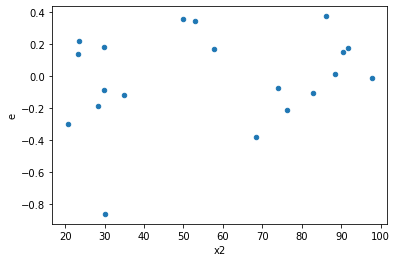

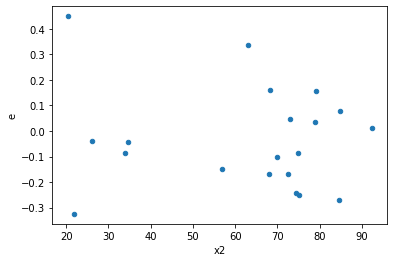

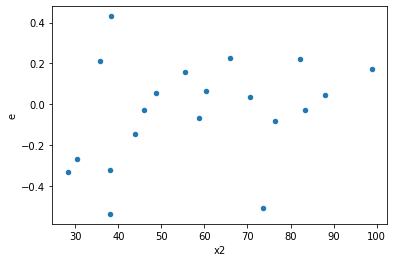

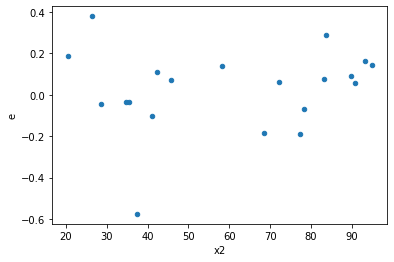

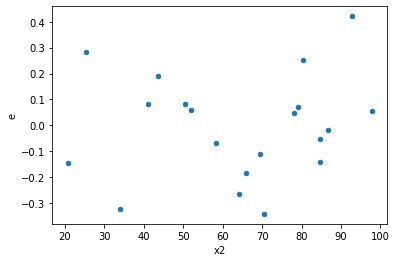

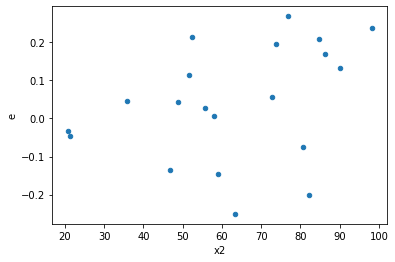

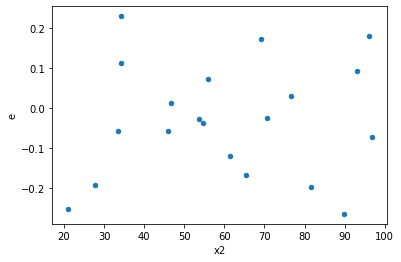

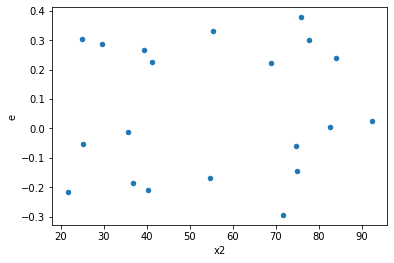

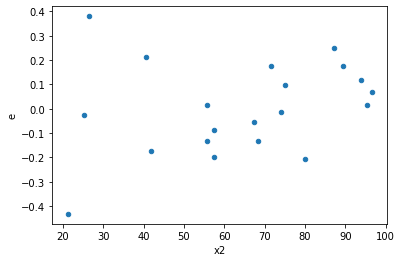

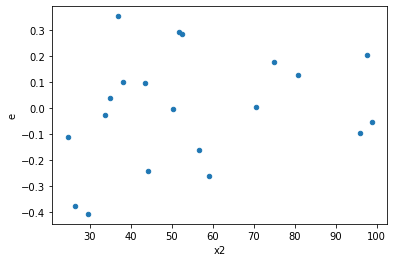

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,6.0,6.0,0.23348490652968554,0.24431437803193784,0.038914151088280925,0.04071906300532297,1.0463818910747251,0.9575170857381985,0.5212414571309008,0.47875854286909925,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,0.031289582616229966,0.272168689619983,0.005214930436038327,0.04536144826999716,8.69838031903975,0.018673518249048948,0.9906632408754755,0.009336759124524474,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,0.09885742457703217,0.17760259274777063,0.016476237429505363,0.02960043212462844,1.7965528993664837,0.4941193206062222,0.7529403396968889,0.2470596603031111,Reject005=1 : Homoscedasticity
14.0,6.0,6.0,0.08011012240174159,0.27631630099210375,0.013351687066956932,0.04605271683201729,3.4492058270291275,0.15740662808840167,0.9212966859557992,0.07870331404420083,Reject005=1 : Homoscedasticity
15.0,6.0,6.0,0.1244615702571648,0.19085829228360524,0.0207435950428608,0.03180971538060087,1.533471672334282,0.6166977615112024,0.6916511192443988,0.3083488807556012,Reject005=1 : Homoscedasticity
17.0,6.0,6.0,0.01102373923273277,0.062149953562985076,0.0018372898721221284,0.010358325593830845,5.637828712279706,0.05386165091072859,0.9730691745446357,0.026930825455364293,Reject005=1 : Homoscedasticity
23.0,6.0,6.0,0.06997471102987554,0.08161912470898437,0.01166245183831259,0.013603187451497396,1.166408885549199,0.8565406962422322,0.5717296518788839,0.4282703481211161,Reject005=1 : Homoscedasticity
24.0,6.0,6.0,0.04421360857248854,0.14379247359089972,0.007368934762081423,0.023965412265149953,3.252222069934665,0.17699599168327573,0.9115020041583621,0.08849799584163787,Reject005=1 : Homoscedasticity
28.0,6.0,6.0,0.20934465005711048,0.25667271542422576,0.03489077500951841,0.04277878590403763,1.2260772623241336,0.8108829597470701,0.5945585201264649,0.40544147987353507,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.9484641107284872,0.1988993283106902,0.15807735178808122,0.0331498880517817,0.20970675227544613,0.07897626130486307,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,0.26011996234068135,0.25818341531201766,0.04335332705678022,0.04303056921866961,0.9925551771911785,0.9929944660936184,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,0.23348490652968554,0.24431437803193784,0.038914151088280925,0.04071906300532297,1.0463818910747251,0.9575170857381985,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.14367341069657072,0.11004793538975435,0.023945568449428453,0.01834132256495906,0.76595895410438,0.7544021786249452,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,0.18271975801477908,0.11504923284836625,0.03045329300246318,0.019174872141394374,0.6296485618104892,0.5883344082782743,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,0.031289582616229966,0.272168689619983,0.005214930436038327,0.04536144826999716,8.69838031903975,0.018673518249048948,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,0.09885742457703217,0.17760259274777063,0.016476237429505363,0.02960043212462844,1.7965528993664837,0.4941193206062222,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,0.3499995395946621,0.22479736798485292,0.05833325659911035,0.03746622799747549,0.6422790391244313,0.604322132651376,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,0.38148253711937324,0.03679819586308852,0.06358042285322887,0.006133032643848087,0.0964610231990086,0.01188397502184401,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      890
Reject005=0 : Heteroscedasticity    110
Name: Result_test, dtype: int64